In [1]:
import math
import numpy as np
import torch
import gpytorch
import tqdm
import random
from matplotlib import pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
#import sys
#sys.path.append("../")
#sys.path.append("../utils")
from directionalvi.RBFKernelDirectionalGrad import RBFKernelDirectionalGrad
from directionalvi.DirectionalGradVariationalStrategy import DirectionalGradVariationalStrategy
from directionalvi.directional_vi import train_gp
from directionalvi.utils.metrics import MSE

in Directional Grad Variational Strategy.py
is directional_vi updating?


# Train Model

In [2]:
def f(x):
  # f(x) = sin(2pi(x**2+y**2)), df/dx = cos(2pi(x**2+y**2))4pi*x
  fx = torch.sin(2*np.pi*torch.sum(x**2,dim=1))
  gx = 4*np.pi*( torch.cos(2*np.pi*torch.sum(x**2,dim=1)) * x.T).T
  fx = fx.reshape(len(x),1)
  return torch.cat([fx,gx],1)


In [3]:

# data parameters
n   = 300
dim = 3
n_test = 1000

# training params
num_inducing = 20
num_directions = dim
batch_size = int(n/2)
minibatch_size = batch_size
num_epochs = 4000

# seed
# torch.random.manual_seed(0)

# generate training data
train_x = torch.rand(n,dim)
train_y = f(train_x)
train_dataset = TensorDataset(train_x,train_y)

# testing data
test_x = torch.rand(n_test,dim)
test_y = f(test_x)
test_dataset = TensorDataset(test_x,test_y)
test_loader = DataLoader(test_dataset, batch_size=n_test, shuffle=False)


# train
model,likelihood = train_gp(train_dataset,
                      num_inducing=num_inducing,
                      num_directions=num_directions,
                      minibatch_size = minibatch_size,
                      minibatch_dim = num_directions,
                      num_epochs =num_epochs
                      )

# Set into eval mode
model.eval()
likelihood.eval();

Epoch:   0%|▏                                                             | 16/4000 [00:06<25:49,  2.57it/s, loss=11.2]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  5.48it/s]


Epoch:   1%|▊                                                             | 49/4000 [00:18<24:17,  2.71it/s, loss=9.37]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  5.03it/s]


Epoch:   2%|█▎                                                            | 82/4000 [00:31<25:27,  2.57it/s, loss=5.82]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  5.49it/s]


Epoch:   3%|█▊                                                           | 115/4000 [00:44<27:18,  2.37it/s, loss=4.07]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  5.30it/s]


Epoch:   4%|██▎                                                          | 148/4000 [00:58<28:59,  2.21it/s, loss=3.38]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  5.06it/s]


Epoch:   5%|██▊                                                          | 181/4000 [01:13<27:33,  2.31it/s, loss=3.29]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.42it/s]


Epoch:   5%|███▎                                                         | 214/4000 [01:31<46:36,  1.35it/s, loss=3.04]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.56it/s]


Epoch:   6%|███▊                                                          | 247/4000 [01:50<34:56,  1.79it/s, loss=2.8]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.94it/s]


Epoch:   7%|████▎                                                         | 280/4000 [02:12<41:17,  1.50it/s, loss=2.8]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.09it/s]


Epoch:   8%|████▊                                                         | 313/4000 [02:35<44:56,  1.37it/s, loss=2.8]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.76it/s]


Epoch:   9%|█████▎                                                       | 346/4000 [02:54<35:08,  1.73it/s, loss=3.05]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  4.32it/s]


Epoch:   9%|█████▊                                                       | 379/4000 [03:09<25:40,  2.35it/s, loss=2.86]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  5.21it/s]


Epoch:  10%|██████▎                                                      | 412/4000 [03:23<22:57,  2.60it/s, loss=2.77]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  5.54it/s]


Epoch:  11%|██████▊                                                      | 445/4000 [03:37<24:42,  2.40it/s, loss=2.76]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  5.85it/s]


Epoch:  12%|███████▎                                                     | 478/4000 [03:50<25:30,  2.30it/s, loss=2.74]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  5.15it/s]


Epoch:  13%|███████▊                                                     | 511/4000 [04:03<22:09,  2.63it/s, loss=2.74]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  4.15it/s]


Epoch:  14%|████████▎                                                    | 544/4000 [04:14<14:53,  3.87it/s, loss=2.66]


Epoch:  14%|████████▌                                                    | 561/4000 [04:19<18:48,  3.05it/s, loss=2.44]


Epoch:  14%|████████▊                                                    | 578/4000 [04:24<15:07,  3.77it/s, loss=2.54]


Epoch:  15%|█████████                                                    | 595/4000 [04:28<16:30,  3.44it/s, loss=2.73]


Epoch:  15%|█████████▎                                                   | 612/4000 [04:33<13:11,  4.28it/s, loss=2.68]


Epoch:  16%|█████████▌                                                   | 629/4000 [04:38<18:34,  3.02it/s, loss=2.46]


Epoch:  16%|█████████▊                                                   | 646/4000 [04:43<18:32,  3.01it/s, loss=2.53]


Epoch:  17%|██████████                                                   | 662/4000 [04:48<16:37,  3.35it/s, loss=2.46]


Epoch:  17%|██████████▎                                                  | 679/4000 [04:53<17:16,  3.20it/s, loss=2.56]


Epoch:  17%|██████████▌                                                  | 695/4000 [04:58<13:45,  4.00it/s, loss=2.47]


Epoch:  18%|██████████▊                                                  | 712/4000 [05:02<15:16,  3.59it/s, loss=2.43]


Epoch:  18%|███████████                                                  | 728/4000 [05:07<17:14,  3.16it/s, loss=2.51]


Epoch:  19%|███████████▎                                                 | 745/4000 [05:13<22:20,  2.43it/s, loss=2.66]


Epoch:  19%|███████████▌                                                 | 761/4000 [05:20<22:49,  2.36it/s, loss=2.57]


Epoch:  19%|███████████▊                                                 | 778/4000 [05:27<20:03,  2.68it/s, loss=2.68]


Epoch:  20%|████████████▎                                                 | 794/4000 [05:32<16:41,  3.20it/s, loss=2.6]


Epoch:  20%|████████████▎                                                | 811/4000 [05:38<16:39,  3.19it/s, loss=2.53]


Epoch:  21%|████████████▌                                                | 827/4000 [05:43<16:52,  3.13it/s, loss=2.54]


Epoch:  21%|█████████████                                                 | 844/4000 [05:48<17:38,  2.98it/s, loss=2.4]


Epoch:  22%|█████████████                                                | 860/4000 [05:54<18:50,  2.78it/s, loss=2.65]


Epoch:  22%|█████████████▎                                               | 877/4000 [06:00<18:13,  2.85it/s, loss=2.49]


Epoch:  22%|█████████████▌                                               | 893/4000 [06:06<15:52,  3.26it/s, loss=2.52]


Epoch:  23%|██████████████                                                | 910/4000 [06:11<15:39,  3.29it/s, loss=2.5]


Epoch:  23%|██████████████                                               | 926/4000 [06:17<20:14,  2.53it/s, loss=2.47]


Epoch:  24%|██████████████▍                                              | 943/4000 [06:22<14:15,  3.57it/s, loss=2.58]


Epoch:  24%|██████████████▌                                              | 959/4000 [06:27<13:54,  3.64it/s, loss=2.56]


Epoch:  24%|██████████████▉                                              | 976/4000 [06:32<14:27,  3.49it/s, loss=2.49]


Epoch:  25%|███████████████▏                                             | 992/4000 [06:36<14:11,  3.53it/s, loss=2.56]


Epoch:  25%|███████████████▏                                            | 1009/4000 [06:41<15:03,  3.31it/s, loss=2.53]


Epoch:  26%|███████████████▎                                            | 1025/4000 [06:46<15:53,  3.12it/s, loss=2.56]


Epoch:  26%|███████████████▋                                            | 1042/4000 [06:51<12:57,  3.80it/s, loss=2.54]


Epoch:  26%|███████████████▊                                            | 1058/4000 [06:55<11:59,  4.09it/s, loss=2.63]


Epoch:  27%|████████████████▍                                            | 1075/4000 [07:00<13:04,  3.73it/s, loss=2.5]


Epoch:  27%|████████████████▎                                           | 1091/4000 [07:04<11:42,  4.14it/s, loss=2.52]


Epoch:  28%|████████████████▌                                           | 1108/4000 [07:09<13:35,  3.55it/s, loss=2.37]


Epoch:  28%|████████████████▉                                           | 1126/4000 [07:13<10:43,  4.47it/s, loss=2.54]


Epoch:  29%|█████████████████▏                                          | 1143/4000 [07:17<12:55,  3.68it/s, loss=2.47]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  6.23it/s]


Epoch:  29%|█████████████████▋                                          | 1176/4000 [07:27<14:01,  3.35it/s, loss=2.43]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  7.98it/s]


Epoch:  30%|██████████████████▏                                         | 1209/4000 [07:37<11:28,  4.05it/s, loss=2.56]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  6.56it/s]


Epoch:  31%|██████████████████▋                                         | 1242/4000 [07:46<11:59,  3.83it/s, loss=2.42]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  7.31it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  8.03it/s]


Epoch:  32%|███████████████████▍                                        | 1292/4000 [08:01<17:11,  2.62it/s, loss=2.53]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  5.18it/s]


Epoch:  33%|███████████████████▉                                        | 1325/4000 [08:14<13:05,  3.41it/s, loss=2.41]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  8.28it/s]


Epoch:  34%|████████████████████▎                                       | 1358/4000 [08:25<14:14,  3.09it/s, loss=2.51]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  7.55it/s]


Epoch:  35%|████████████████████▊                                       | 1391/4000 [08:36<13:54,  3.12it/s, loss=2.35]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  7.26it/s]


Epoch:  36%|█████████████████████▎                                      | 1424/4000 [08:46<16:17,  2.64it/s, loss=2.41]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  7.50it/s]


Epoch:  36%|█████████████████████▊                                      | 1457/4000 [08:57<14:15,  2.97it/s, loss=2.39]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  7.19it/s]


Epoch:  37%|██████████████████████▎                                     | 1490/4000 [09:07<13:40,  3.06it/s, loss=2.47]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  6.35it/s]


Epoch:  38%|██████████████████████▊                                     | 1523/4000 [09:19<13:40,  3.02it/s, loss=2.54]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  5.56it/s]


Epoch:  39%|███████████████████████▎                                    | 1556/4000 [09:30<14:01,  2.90it/s, loss=2.45]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  6.88it/s]


Epoch:  40%|███████████████████████▊                                    | 1589/4000 [09:41<11:31,  3.49it/s, loss=2.44]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  7.45it/s]


Epoch:  41%|████████████████████████▎                                   | 1622/4000 [09:50<10:57,  3.62it/s, loss=2.43]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  7.39it/s]


Epoch:  41%|████████████████████████▊                                   | 1655/4000 [09:59<10:23,  3.76it/s, loss=2.46]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  8.58it/s]


Epoch:  42%|█████████████████████████▎                                  | 1688/4000 [10:07<09:35,  4.02it/s, loss=2.37]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  8.06it/s]


Epoch:  43%|█████████████████████████▊                                  | 1721/4000 [10:15<09:03,  4.19it/s, loss=2.43]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  9.09it/s]


Epoch:  44%|██████████████████████████▋                                  | 1754/4000 [10:23<08:43,  4.29it/s, loss=2.4]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  8.50it/s]


Epoch:  45%|██████████████████████████▊                                 | 1787/4000 [10:31<08:47,  4.19it/s, loss=2.44]


Epoch:  45%|███████████████████████████                                 | 1804/4000 [10:35<08:07,  4.50it/s, loss=2.49]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  9.17it/s]


Epoch:  46%|███████████████████████████▌                                | 1840/4000 [10:43<08:19,  4.32it/s, loss=2.49]


Epoch:  46%|███████████████████████████▉                                | 1860/4000 [10:47<07:34,  4.71it/s, loss=2.36]


Epoch:  47%|████████████████████████████▏                               | 1880/4000 [10:52<07:37,  4.63it/s, loss=2.35]


Epoch:  48%|████████████████████████████▌                               | 1900/4000 [10:56<07:38,  4.58it/s, loss=2.48]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 10.05it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  9.71it/s]


Epoch:  49%|█████████████████████████████▍                              | 1959/4000 [11:10<11:04,  3.07it/s, loss=2.42]


Epoch:  49%|██████████████████████████████                               | 1975/4000 [11:15<09:12,  3.66it/s, loss=2.4]


Epoch:  50%|█████████████████████████████▉                              | 1992/4000 [11:20<10:44,  3.12it/s, loss=2.54]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  7.31it/s]


Epoch:  51%|██████████████████████████████▉                              | 2025/4000 [11:30<09:10,  3.59it/s, loss=2.4]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  8.01it/s]


Epoch:  51%|██████████████████████████████▊                             | 2058/4000 [11:39<09:21,  3.46it/s, loss=2.47]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  4.16it/s]


Epoch:  52%|███████████████████████████████▎                            | 2091/4000 [11:51<13:06,  2.43it/s, loss=2.43]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  6.05it/s]


Epoch:  53%|███████████████████████████████▊                            | 2124/4000 [12:03<12:19,  2.54it/s, loss=2.42]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  6.59it/s]


Epoch:  54%|████████████████████████████████▉                            | 2157/4000 [12:15<16:10,  1.90it/s, loss=2.4]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  4.84it/s]


Epoch:  55%|████████████████████████████████▊                           | 2190/4000 [12:29<12:28,  2.42it/s, loss=2.44]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.86it/s]


Epoch:  56%|█████████████████████████████████▎                          | 2223/4000 [12:46<16:33,  1.79it/s, loss=2.45]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  5.35it/s]


Epoch:  56%|██████████████████████████████████▍                          | 2256/4000 [12:59<09:10,  3.17it/s, loss=2.4]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  6.28it/s]


Epoch:  57%|██████████████████████████████████▎                         | 2289/4000 [13:11<12:23,  2.30it/s, loss=2.47]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  8.20it/s]


Epoch:  58%|██████████████████████████████████▊                         | 2322/4000 [13:22<07:18,  3.83it/s, loss=2.39]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  7.04it/s]


Epoch:  59%|███████████████████████████████████▎                        | 2355/4000 [13:32<08:06,  3.38it/s, loss=2.43]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  8.05it/s]


Epoch:  60%|████████████████████████████████████▍                        | 2388/4000 [13:41<07:37,  3.52it/s, loss=2.4]


Epoch:  60%|████████████████████████████████████                        | 2405/4000 [13:45<07:13,  3.68it/s, loss=2.42]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  6.87it/s]


Epoch:  61%|████████████████████████████████████▌                       | 2438/4000 [13:54<07:10,  3.63it/s, loss=2.37]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  9.72it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 10.20it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  8.28it/s]


Epoch:  63%|█████████████████████████████████████▌                      | 2508/4000 [14:11<06:59,  3.56it/s, loss=2.35]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  6.97it/s]


Epoch:  64%|██████████████████████████████████████                      | 2541/4000 [14:21<07:29,  3.25it/s, loss=2.41]


Epoch:  64%|██████████████████████████████████████▎                     | 2558/4000 [14:25<05:41,  4.22it/s, loss=2.33]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  7.50it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  6.84it/s]


Epoch:  65%|███████████████████████████████████████▊                     | 2610/4000 [14:39<06:14,  3.71it/s, loss=2.4]


Epoch:  66%|███████████████████████████████████████▍                    | 2627/4000 [14:43<05:22,  4.26it/s, loss=2.49]


Epoch:  66%|███████████████████████████████████████▋                    | 2644/4000 [14:47<05:27,  4.15it/s, loss=2.46]


Epoch:  67%|███████████████████████████████████████▉                    | 2661/4000 [14:51<05:43,  3.90it/s, loss=2.51]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  7.47it/s]


Epoch:  67%|████████████████████████████████████████▍                   | 2694/4000 [15:00<08:36,  2.53it/s, loss=2.49]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  5.22it/s]


Epoch:  68%|████████████████████████████████████████▉                   | 2727/4000 [15:12<08:06,  2.62it/s, loss=2.43]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  4.02it/s]


Epoch:  69%|█████████████████████████████████████████▍                  | 2760/4000 [15:28<10:06,  2.04it/s, loss=2.48]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  5.88it/s]


Epoch:  70%|█████████████████████████████████████████▉                  | 2793/4000 [15:40<07:10,  2.81it/s, loss=2.44]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  5.07it/s]


Epoch:  71%|███████████████████████████████████████████                  | 2826/4000 [15:53<08:02,  2.43it/s, loss=2.4]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  4.81it/s]


Epoch:  71%|███████████████████████████████████████████▌                 | 2859/4000 [16:08<09:33,  1.99it/s, loss=2.5]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  4.22it/s]


Epoch:  72%|███████████████████████████████████████████▍                | 2892/4000 [16:23<06:54,  2.67it/s, loss=2.38]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.79it/s]


Epoch:  73%|████████████████████████████████████████████▌                | 2925/4000 [16:36<06:13,  2.88it/s, loss=2.4]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  4.57it/s]


Epoch:  74%|████████████████████████████████████████████▎               | 2958/4000 [16:49<05:59,  2.90it/s, loss=2.45]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  6.30it/s]


Epoch:  75%|████████████████████████████████████████████▊               | 2991/4000 [17:01<04:54,  3.43it/s, loss=2.39]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  7.29it/s]


Epoch:  76%|█████████████████████████████████████████████▎              | 3024/4000 [17:11<05:20,  3.05it/s, loss=2.46]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  7.25it/s]


Epoch:  76%|█████████████████████████████████████████████▊              | 3057/4000 [17:20<04:06,  3.83it/s, loss=2.37]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  7.67it/s]


Epoch:  77%|██████████████████████████████████████████████▎             | 3090/4000 [17:29<04:01,  3.77it/s, loss=2.45]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  7.89it/s]


Epoch:  78%|██████████████████████████████████████████████▊             | 3123/4000 [17:38<03:47,  3.85it/s, loss=2.39]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  7.26it/s]


Epoch:  79%|███████████████████████████████████████████████▎            | 3156/4000 [17:47<03:45,  3.75it/s, loss=2.43]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  6.88it/s]


Epoch:  80%|███████████████████████████████████████████████▊            | 3189/4000 [17:56<03:46,  3.58it/s, loss=2.45]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  7.68it/s]


Epoch:  81%|████████████████████████████████████████████████▎           | 3222/4000 [18:05<03:48,  3.40it/s, loss=2.48]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  7.24it/s]


Epoch:  81%|████████████████████████████████████████████████▊           | 3255/4000 [18:15<03:51,  3.22it/s, loss=2.45]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  6.69it/s]


Epoch:  82%|█████████████████████████████████████████████████▎          | 3288/4000 [18:26<03:52,  3.06it/s, loss=2.44]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  6.53it/s]


Epoch:  83%|█████████████████████████████████████████████████▊          | 3321/4000 [18:37<04:03,  2.78it/s, loss=2.43]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  5.61it/s]


Epoch:  84%|██████████████████████████████████████████████████▎         | 3354/4000 [18:49<04:16,  2.51it/s, loss=2.37]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.43it/s]


Epoch:  85%|███████████████████████████████████████████████████▋         | 3387/4000 [19:06<05:58,  1.71it/s, loss=2.4]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.39it/s]


Epoch:  86%|███████████████████████████████████████████████████▎        | 3420/4000 [19:24<04:47,  2.01it/s, loss=2.42]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.22it/s]


Epoch:  86%|███████████████████████████████████████████████████▊        | 3453/4000 [19:39<03:29,  2.62it/s, loss=2.44]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  5.12it/s]


Epoch:  87%|████████████████████████████████████████████████████▎       | 3486/4000 [19:52<03:57,  2.17it/s, loss=2.42]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  6.40it/s]


Epoch:  88%|████████████████████████████████████████████████████▊       | 3519/4000 [20:03<02:33,  3.14it/s, loss=2.42]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  7.83it/s]


Epoch:  89%|█████████████████████████████████████████████████████▎      | 3552/4000 [20:12<02:07,  3.50it/s, loss=2.45]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  8.41it/s]


Epoch:  90%|█████████████████████████████████████████████████████▊      | 3585/4000 [20:20<01:43,  4.01it/s, loss=2.35]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  9.05it/s]


Epoch:  90%|██████████████████████████████████████████████████████▎     | 3618/4000 [20:30<01:32,  4.13it/s, loss=2.47]


Epoch:  91%|██████████████████████████████████████████████████████▌     | 3635/4000 [20:34<01:41,  3.59it/s, loss=2.45]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  7.74it/s]


Epoch:  92%|███████████████████████████████████████████████████████     | 3668/4000 [20:44<01:48,  3.07it/s, loss=2.42]


Epoch:  92%|███████████████████████████████████████████████████████▎    | 3685/4000 [20:50<01:36,  3.26it/s, loss=2.38]


Epoch:  93%|███████████████████████████████████████████████████████▌    | 3701/4000 [20:54<01:22,  3.64it/s, loss=2.36]


Epoch:  93%|███████████████████████████████████████████████████████▊    | 3718/4000 [20:59<01:21,  3.46it/s, loss=2.46]


Epoch:  93%|████████████████████████████████████████████████████████    | 3734/4000 [21:04<01:27,  3.05it/s, loss=2.43]


Epoch:  94%|████████████████████████████████████████████████████████▎   | 3751/4000 [21:10<01:09,  3.59it/s, loss=2.46]


Epoch:  94%|████████████████████████████████████████████████████████▌   | 3767/4000 [21:14<00:58,  4.00it/s, loss=2.48]


Epoch:  95%|████████████████████████████████████████████████████████▊   | 3784/4000 [21:19<01:05,  3.29it/s, loss=2.38]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  9.33it/s]


Epoch:  95%|█████████████████████████████████████████████████████████▎  | 3817/4000 [21:28<00:49,  3.67it/s, loss=2.34]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  6.53it/s]


Epoch:  96%|██████████████████████████████████████████████████████████▋  | 3850/4000 [21:36<00:38,  3.94it/s, loss=2.5]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  7.83it/s]


Epoch:  97%|██████████████████████████████████████████████████████████▏ | 3883/4000 [21:46<00:35,  3.31it/s, loss=2.47]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  8.29it/s]


Epoch:  98%|██████████████████████████████████████████████████████████▋ | 3916/4000 [21:55<00:22,  3.74it/s, loss=2.48]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  7.77it/s]


Epoch:  99%|███████████████████████████████████████████████████████████▏| 3949/4000 [22:05<00:14,  3.44it/s, loss=2.38]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  7.07it/s]


Epoch: 100%|███████████████████████████████████████████████████████████▋| 3982/4000 [22:14<00:05,  3.16it/s, loss=2.44]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  6.79it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  6.48it/s]
                                                                                                                       


Done Training!


# Test Model

In [4]:
kwargs = {}
derivative_directions = torch.eye(dim)[:num_directions]
derivative_directions = derivative_directions.repeat(n_test,1)
kwargs['derivative_directions'] = derivative_directions
#means   = model(test_x, **kwargs).mean.cpu()
means = torch.tensor([0.])
test_y = torch.zeros(1,dim+1)
test_x = torch.zeros(1,dim)
with torch.no_grad():
    for x_batch, y_batch in test_loader:
        #print(y_batch)
        preds = model(x_batch,**kwargs)
        #print("shape is")
        #print(preds.mean.shape)
        means = torch.cat([means, preds.mean.cpu()])
        test_y = torch.cat([test_y, y_batch])
        test_x = torch.cat([test_x, x_batch])

means = means[1:]
test_y = test_y[1:]
test_x = test_x[1:]

In [5]:
# compute MSE
test_mse = MSE(test_y[:,0],means[::num_directions+1])
#test_mse = MSE(test_y[::2, 0].T, means[::num_directions+1])
print(f"\nTesting MSE: {test_mse}")


Testing MSE: 0.07446526736021042


# Plotting

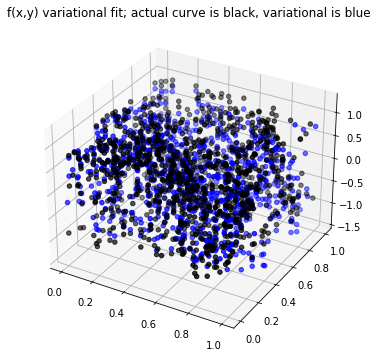

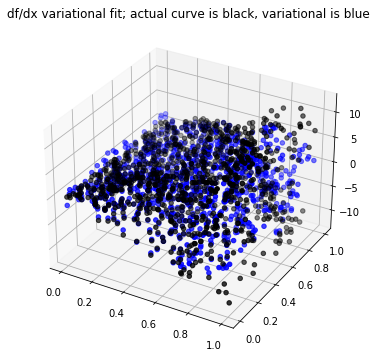

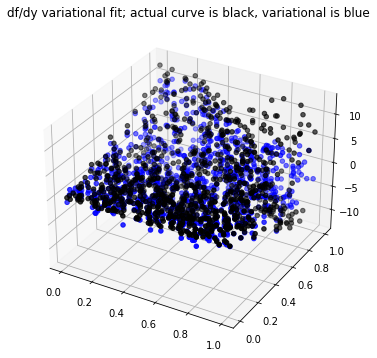

In [6]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(test_x[:,0],test_x[:,1],test_y[:,0], color='k')
ax.scatter(test_x[:,0],test_x[:,1],means[::num_directions+1], color='b')
plt.title("f(x,y) variational fit; actual curve is black, variational is blue")
plt.show()
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(test_x[:,0],test_x[:,1],test_y[:,1], color='k')
ax.scatter(test_x[:,0],test_x[:,1],means[1::num_directions+1], color='b')
plt.title("df/dx variational fit; actual curve is black, variational is blue")
plt.show()
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(test_x[:,0],test_x[:,1],test_y[:,2], color='k')
ax.scatter(test_x[:,0],test_x[:,1],means[2::num_directions+1], color='b')
plt.title("df/dy variational fit; actual curve is black, variational is blue")
plt.show()